
# Zero Initialization - Bias Initialization

In [1]:
import math
import os
import random

import joblib
import numpy as np
import optuna
import torch
from torch.optim import Adam, RMSprop, SGD
from torch.utils.tensorboard import SummaryWriter

from config import ExperimentConfig
from data import get_mnist_loader, get_cifar10_loader
from models import FNN, CNN, CIFARCNN, ResNet50
from train import run_experiments, Trainer

ELU_SCALE_NORMAL = math.sqrt(1.615)
ELU_SCALE_UNIFORM = math.sqrt(1.574)
RELU_SCALE = math.sqrt(2)
R_SEED = 1777

## 1 MNIST - FNN

### 1.1 Normal Distribution

In [ ]:
train_loader, val_loader = get_mnist_loader(train=True, batch_size=32)
test_loader = get_mnist_loader(train=False, batch_size=32)

#### 1.1.1 Pytorch Default Initialization

In [ ]:
model = FNN(
    [
        {"in_features": 28 * 28, "out_features": 500},
        {"in_features": 500, "out_features": 10},
    ]
)

config = ExperimentConfig(
    model_name="MNIST_FNN",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

#### 1.1.2 Standard Normal Distribution

In [ ]:
model = FNN(
    [
        {"in_features": 28 * 28, "out_features": 500},
        {"in_features": 500, "out_features": 10},
    ]
)
model.initialize(mode="normal")

config = ExperimentConfig(
    model_name="MNIST_FNN_NORMAL",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

#### 1.1.3 Negative Mean Shift

In [ ]:
model = FNN(
    [
        {"in_features": 28 * 28, "out_features": 500},
        {"in_features": 500, "out_features": 10},
    ]
)
model.initialize(mode="normal", mean=-1.0)

config = ExperimentConfig(
    model_name="MNIST_FNN_NORMAL_MEAN_NEG",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

#### 1.1.4 Positive Mean Shift

In [ ]:
model = FNN(
    [
        {"in_features": 28 * 28, "out_features": 500},
        {"in_features": 500, "out_features": 10},
    ]
)
model.initialize(mode="normal", mean=1.0)

config = ExperimentConfig(
    model_name="MNIST_FNN_NORMAL_MEAN_POS",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

#### 1.1.5 Negative Mean Shift High

In [ ]:
torch.manual_seed(R_SEED)
random.seed(R_SEED)
np.random.seed(R_SEED)

model = FNN(
    [
        {"in_features": 28 * 28, "out_features": 500},
        {"in_features": 500, "out_features": 10},
    ]
)
model.initialize(mode="normal", mean=-5.0)

config = ExperimentConfig(
    model_name="MNIST_FNN_NORMAL_NEG_HIGH",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

#### 1.1.6 Positive Mean Shift High

In [ ]:
model = FNN(
    [
        {"in_features": 28 * 28, "out_features": 500},
        {"in_features": 500, "out_features": 10},
    ]
)
model.initialize(mode="normal", mean=5.0)

config = ExperimentConfig(
    model_name="MNIST_FNN_NORMAL_MEAN_POS_HIGH",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

#### 1.1.7 Negative Mean Shift very High

In [ ]:
model = FNN(
    [
        {"in_features": 28 * 28, "out_features": 500},
        {"in_features": 500, "out_features": 10},
    ]
)
model.initialize(mode="normal", mean=-50.0)

config = ExperimentConfig(
    model_name="MNIST_FNN_NORMAL_MEAN_NEG_OVER",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

#### 1.1.8 Positive Mean Shift very High

In [ ]:
model = FNN(
    [
        {"in_features": 28 * 28, "out_features": 500},
        {"in_features": 500, "out_features": 10},
    ]
)
model.initialize(mode="normal", mean=50.0)

config = ExperimentConfig(
    model_name="MNIST_FNN_NORMAL_MEAN_POS_OVER",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = FNN(
    [
        {"in_features": 28 * 28, "out_features": 500},
        {"in_features": 500, "out_features": 10},
    ]
)
model.initialize(mode="normal", softmax_init=True)

config = ExperimentConfig(
    model_name="MNIST_FNN_NORMAL_LAST_LAYER",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = FNN(
    [
        {"in_features": 28 * 28, "out_features": 500},
        {"in_features": 500, "out_features": 10},
    ]
)
model.initialize(mode="normal", scale_factor=ELU_SCALE_NORMAL)

config = ExperimentConfig(
    model_name="MNIST_FNN_NORMAL_ELU_SCALE",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = FNN(
    [
        {"in_features": 28 * 28, "out_features": 500},
        {"in_features": 500, "out_features": 10},
    ]
)
model.initialize(mode="normal", scale_factor=0.1)

config = ExperimentConfig(
    model_name="MNIST_FNN_NORMAL_0.1_STD",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = FNN(
    [
        {"in_features": 28 * 28, "out_features": 500},
        {"in_features": 500, "out_features": 10},
    ]
)
model.initialize(mode="normal", scale_factor=0.5)

config = ExperimentConfig(
    model_name="MNIST_FNN_NORMAL_0.5_STD",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = FNN(
    [
        {"in_features": 28 * 28, "out_features": 500},
        {"in_features": 500, "out_features": 10},
    ]
)
model.initialize(mode="normal", scale_factor=2)

config = ExperimentConfig(
    model_name="MNIST_FNN_NORMAL_2.0_STD",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = FNN(
    [
        {"in_features": 28 * 28, "out_features": 500},
        {"in_features": 500, "out_features": 10},
    ]
)
model.initialize(mode="normal_in_features")

config = ExperimentConfig(
    model_name="MNIST_FNN_NORMAL_IN_FEATURES",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = FNN(
    [
        {"in_features": 28 * 28, "out_features": 500},
        {"in_features": 500, "out_features": 10},
    ]
)
model.initialize(mode="normal_in_features", softmax_init=True)

config = ExperimentConfig(
    model_name="MNIST_FNN_NORMAL_IN_FEATURES_LAST_LAYER",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

#### 1.1.1 Finding The Point Of Break

In [ ]:
train_loader, val_loader = get_mnist_loader(train=True, batch_size=32)
test_loader = get_mnist_loader(train=False, batch_size=32)

In [ ]:
factor_range = range(10, 301, 10)

for factor in factor_range:
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    model = FNN(
        [
            {"in_features": 28 * 28, "out_features": 500},
            {"in_features": 500, "out_features": 10},
        ]
    )
    model.initialize(mode="normal", scale_factor=factor)
    writer = SummaryWriter(f"./results/MNIST_FNN_NORMAL_1_{factor}")
    trainer = Trainer(model=model, lr=0.001, writer=writer)

    trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=30, train_summary=False)

In [ ]:
factors = [10, 100, 1000, 10_000, 100_000, 1_000_000]

for factor in factors:
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    factor = 1 / factor

    model = FNN(
        [
            {"in_features": 28 * 28, "out_features": 500},
            {"in_features": 500, "out_features": 10},
        ]
    )
    model.initialize(mode="normal", scale_factor=factor)
    writer = SummaryWriter(f"./results/MNIST_FNN_NORMAL_1_DOWN_{factor}")
    trainer = Trainer(model=model, lr=0.001, writer=writer)

    trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=30, train_summary=False)

In [ ]:
factor_range = range(10, 301, 10)

for factor in factor_range:
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    model = FNN(
        [
            {"in_features": 28 * 28, "out_features": 400},
            {"in_features": 400, "out_features": 300},
            {"in_features": 300, "out_features": 150},
            {"in_features": 150, "out_features": 10},
        ]
    )
    model.initialize(mode="normal", scale_factor=factor)
    writer = SummaryWriter(f"./results/MNIST_FNN_NORMAL_2_{factor}")
    trainer = Trainer(model=model, lr=0.001, writer=writer)

    trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=30, train_summary=False)

In [ ]:
factors = [10, 100, 1000, 10_000, 100_000, 1_000_000]

for factor in factors:
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    factor = 1 / factor

    model = FNN(
        [
            {"in_features": 28 * 28, "out_features": 400},
            {"in_features": 400, "out_features": 300},
            {"in_features": 300, "out_features": 150},
            {"in_features": 150, "out_features": 10},
        ]
    )
    model.initialize(mode="normal", scale_factor=factor)
    writer = SummaryWriter(f"./results/MNIST_FNN_NORMAL_2_DOWN_{factor}")
    trainer = Trainer(model=model, lr=0.001, writer=writer)

    trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=30, train_summary=False)

In [ ]:
train_loader, val_loader = get_mnist_loader(train=True, batch_size=8)
test_loader = get_mnist_loader(train=False, batch_size=8)

In [ ]:
factor_range = range(10, 301, 10)

for factor in factor_range:
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    model = FNN(
        [
            {"in_features": 28 * 28, "out_features": 500},
            {"in_features": 500, "out_features": 10},
        ]
    )
    model.initialize(mode="normal", scale_factor=factor)
    writer = SummaryWriter(f"./results/MNIST_FNN_NORMAL_3_{factor}")
    trainer = Trainer(model=model, lr=0.001, writer=writer)

    trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=30, train_summary=False)

In [ ]:
factor_range = range(120, 221, 10)

for factor in factor_range:
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    model = FNN(
        [
            {"in_features": 28 * 28, "out_features": 400},
            {"in_features": 400, "out_features": 300},
            {"in_features": 300, "out_features": 150},
            {"in_features": 150, "out_features": 10},
        ]
    )
    model.initialize(mode="normal", scale_factor=factor)
    writer = SummaryWriter(f"./results/MNIST_FNN_NORMAL_4_{factor}")
    trainer = Trainer(model=model, lr=0.001, writer=writer)

    trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=30, train_summary=False)

### 1.2 Uniform Distribution

In [ ]:
train_loader, val_loader = get_mnist_loader(train=True, batch_size=32)
test_loader = get_mnist_loader(train=False, batch_size=32)

#### 1.2.1 Zero To One Pre-Activations

In [ ]:
model = FNN(
    [
        {"in_features": 28 * 28, "out_features": 500},
        {"in_features": 500, "out_features": 10},
    ]
)
model.initialize(mode="uniform", a=0, b=1)

config = ExperimentConfig(
    model_name="MNIST_FNN_UNIFORM_0-1",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

#### 1.2.2 Unit Variance And Zero Mean Pre-Activations

In [ ]:
model = FNN(
    [
        {"in_features": 28 * 28, "out_features": 500},
        {"in_features": 500, "out_features": 10},
    ]
)
model.initialize(mode="uniform", a=-math.sqrt(3), b=math.sqrt(3))

config = ExperimentConfig(
    model_name="MNIST_FNN_UNIFORM_PRE_ACT",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = FNN(
    [
        {"in_features": 28 * 28, "out_features": 500},
        {"in_features": 500, "out_features": 10},
    ]
)
model.initialize(mode="deterministic", a=-1.73, b=1.73)

config = ExperimentConfig(
    model_name="MNIST_FNN_UNIFORM_PRE_ACT_DET",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

#### 1.2.3 Unit Variance and Zero Mean Activations

In [ ]:
model = FNN(
    [
        {"in_features": 28 * 28, "out_features": 500},
        {"in_features": 500, "out_features": 10},
    ]
)
model.initialize(mode="uniform", a=-3.437, b=2.222)

config = ExperimentConfig(
    model_name="MNIST_FNN_UNIFORM_UNIT_VAR_ZERO_MEAN",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = FNN(
    [
        {"in_features": 28 * 28, "out_features": 500},
        {"in_features": 500, "out_features": 10},
    ]
)
model.initialize(mode="deterministic", a=-3.437, b=2.222)

config = ExperimentConfig(
    model_name="MNIST_FNN_UNIFORM_UNIT_VAR_ZERO_MEAN_DET",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

#### 1.2.5 Comparison

### 1.3 Compare Our Approach To Others

In [ ]:
def objective(trial):
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    params = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True),
        "optimizer": trial.suggest_categorical("optimizer", [Adam, RMSprop, SGD]),
        "batch_size": trial.suggest_int("batch_size", 4, 64, 2),

    }

    train_loader, val_loader = get_mnist_loader(train=True, batch_size=params["batch_size"])
    test_loader = get_mnist_loader(train=False, batch_size=params["batch_size"])

    model = FNN(
        [
            {"in_features": 28 * 28, "out_features": 500},
            {"in_features": 500, "out_features": 10},
        ]
    )

    writer = SummaryWriter("./results/MNIST_FNN_TRIAL")
    trainer = Trainer(model=model, lr=params["learning_rate"], optimizer=params["optimizer"], writer=writer)
    accuracy = trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=15, trial=trial,
                             train_summary=False)

    return accuracy


study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=28)

joblib.dump(study, os.path.join("results", "optuna", "mnist_fnn.pkl"))

In [2]:
study = joblib.load(os.path.join("results", "optuna", "mnist_fnn.pkl"), 'r')

for key, value in study.best_trial.params.items():
    print("{}: {}".format(key, value))
print(f"final accuracy: {study.best_trial.value}")

optuna.visualization.plot_parallel_coordinate(study)

FileNotFoundError: [Errno 2] No such file or directory: 'results/optuna/mnist_fnn.pkl'

In [ ]:
def objective(trial):
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    params = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True),
        "optimizer": trial.suggest_categorical("optimizer", [Adam, RMSprop, SGD]),
        "batch_size": trial.suggest_int("batch_size", 4, 64, 2),

    }

    train_loader, val_loader = get_mnist_loader(train=True, batch_size=params["batch_size"])
    test_loader = get_mnist_loader(train=False, batch_size=params["batch_size"])

    model = FNN(
        [
            {"in_features": 28 * 28, "out_features": 500},
            {"in_features": 500, "out_features": 10},
        ]
    )
    model.initialize("normal")

    writer = SummaryWriter("./results/MNIST_FNN_TRIAL_NORMAL")
    trainer = Trainer(model=model, lr=params["learning_rate"], optimizer=params["optimizer"], writer=writer)
    accuracy = trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=15, trial=trial,
                             train_summary=False)

    return accuracy


study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=28)

joblib.dump(study, os.path.join("results", "optuna", "mnist_fnn_normal.pkl"))

In [ ]:
study = joblib.load(os.path.join("results", "optuna", "mnist_fnn_normal.pkl"), 'r')

for key, value in study.best_trial.params.items():
    print("{}: {}".format(key, value))
print(f"final accuracy: {study.best_trial.value}")

optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
def objective(trial):
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    params = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True),
        "optimizer": trial.suggest_categorical("optimizer", [Adam, RMSprop, SGD]),
        "batch_size": trial.suggest_int("batch_size", 4, 64, 2),

    }

    train_loader, val_loader = get_mnist_loader(train=True, batch_size=params["batch_size"])
    test_loader = get_mnist_loader(train=False, batch_size=params["batch_size"])

    model = FNN(
        [
            {"in_features": 28 * 28, "out_features": 500},
            {"in_features": 500, "out_features": 10},
        ]
    )
    model.initialize(mode="normal_in_features", softmax_init=True)

    writer = SummaryWriter("./results/MNIST_FNN_TRIAL_NORMAL")
    trainer = Trainer(model=model, lr=params["learning_rate"], optimizer=params["optimizer"], writer=writer)
    accuracy = trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=15, trial=trial,
                             train_summary=False)

    return accuracy


study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=28)

joblib.dump(study, os.path.join("results", "optuna", "mnist_fnn_normal_in_last.pkl"))

In [ ]:
study = joblib.load(os.path.join("results", "optuna", "mnist_fnn_normal_in_last.pkl"), 'r')

for key, value in study.best_trial.params.items():
    print("{}: {}".format(key, value))
print(f"final accuracy: {study.best_trial.value}")

optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
def objective(trial):
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    params = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True),
        "optimizer": trial.suggest_categorical("optimizer", [Adam, RMSprop, SGD]),
        "batch_size": trial.suggest_int("batch_size", 4, 64, 2),

    }

    train_loader, val_loader = get_mnist_loader(train=True, batch_size=params["batch_size"])
    test_loader = get_mnist_loader(train=False, batch_size=params["batch_size"])

    model = FNN(
        [
            {"in_features": 28 * 28, "out_features": 500},
            {"in_features": 500, "out_features": 10},
        ]
    )
    model.initialize("uniform", a=0, b=1)

    writer = SummaryWriter("./results/MNIST_FNN_TRIAL_UNIFORM")
    trainer = Trainer(model=model, lr=params["learning_rate"], optimizer=params["optimizer"], writer=writer)
    accuracy = trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=15, trial=trial,
                             train_summary=False)

    return accuracy


study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=28)

joblib.dump(study, os.path.join("results", "optuna", "mnist_fnn_uniform.pkl"))

In [ ]:
study = joblib.load(os.path.join("results", "optuna", "mnist_fnn_uniform.pkl"), 'r')

for key, value in study.best_trial.params.items():
    print("{}: {}".format(key, value))
print(f"final accuracy: {study.best_trial.value}")

optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
def objective(trial):
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    params = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True),
        "optimizer": trial.suggest_categorical("optimizer", [Adam, RMSprop, SGD]),
        "batch_size": trial.suggest_int("batch_size", 4, 64, 2),

    }

    train_loader, val_loader = get_mnist_loader(train=True, batch_size=params["batch_size"])
    test_loader = get_mnist_loader(train=False, batch_size=params["batch_size"])

    model = FNN(
        [
            {"in_features": 28 * 28, "out_features": 500},
            {"in_features": 500, "out_features": 10},
        ]
    )
    model.initialize(mode="uniform", a=-1.29, b=2.5)

    writer = SummaryWriter("./results/MNIST_FNN_TRIAL_UNIFORM")
    trainer = Trainer(model=model, lr=params["learning_rate"], optimizer=params["optimizer"], writer=writer)
    accuracy = trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=15, trial=trial,
                             train_summary=False)

    return accuracy


study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=28)

joblib.dump(study, os.path.join("results", "optuna", "mnist_fnn_uniform_unit_var.pkl"))

In [ ]:
study = joblib.load(os.path.join("results", "optuna", "mnist_fnn_uniform_unit_var.pkl"), 'r')

for key, value in study.best_trial.params.items():
    print("{}: {}".format(key, value))
print(f"final accuracy: {study.best_trial.value}")

optuna.visualization.plot_parallel_coordinate(study)

## 2 MNIST - CNN

### 2.1 Normal Distribution

In [ ]:
train_loader, val_loader = get_mnist_loader(train=True, batch_size=32, flatten=False)
test_loader = get_mnist_loader(train=False, batch_size=32, flatten=False)

In [ ]:
model = CNN(
    [
        {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
        {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

    ],
    [
        {"in_features": 32 * 28 * 28, "out_features": 10}
    ]
)

config = ExperimentConfig(
    model_name="MNIST_CNN",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = CNN(
    [
        {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
        {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

    ],
    [
        {"in_features": 32 * 28 * 28, "out_features": 10}
    ]
)

model.initialize("normal")

config = ExperimentConfig(
    model_name="MNIST_CNN_NORMAL",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = CNN(
    [
        {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
        {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

    ],
    [
        {"in_features": 32 * 28 * 28, "out_features": 10}
    ]
)

model.initialize("normal", mean=-1.0)

config = ExperimentConfig(
    model_name="MNIST_CNN_NORMAL_MEAN_NEG",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = CNN(
    [
        {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
        {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

    ],
    [
        {"in_features": 32 * 28 * 28, "out_features": 10}
    ]
)

model.initialize("normal", mean=1.0)

config = ExperimentConfig(
    model_name="MNIST_CNN_NORMAL_MEAN_POS",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = CNN(
    [
        {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
        {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

    ],
    [
        {"in_features": 32 * 28 * 28, "out_features": 10}
    ]
)

model.initialize("normal", mean=-5.0)

config = ExperimentConfig(
    model_name="MNIST_CNN_NORMAL_MEAN_NEG_HIGH",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = CNN(
    [
        {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
        {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

    ],
    [
        {"in_features": 32 * 28 * 28, "out_features": 10}
    ]
)

model.initialize("normal", mean=5.0)

config = ExperimentConfig(
    model_name="MNIST_CNN_NORMAL_MEAN_POS_HIGH",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = CNN(
    [
        {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
        {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

    ],
    [
        {"in_features": 32 * 28 * 28, "out_features": 10}
    ]
)

model.initialize("normal", mean=-50.0)

config = ExperimentConfig(
    model_name="MNIST_CNN_NORMAL_MEAN_NEG_OVER",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = CNN(
    [
        {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
        {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

    ],
    [
        {"in_features": 32 * 28 * 28, "out_features": 10}
    ]
)

model.initialize("normal", mean=50.0)

config = ExperimentConfig(
    model_name="MNIST_CNN_NORMAL_MEAN_POS_OVER",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = CNN(
    [
        {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
        {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

    ],
    [
        {"in_features": 32 * 28 * 28, "out_features": 10}
    ]
)

model.initialize("normal_in_features")

config = ExperimentConfig(
    model_name="MNIST_CNN_NORMAL_IN_FEATURES",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = CNN(
    [
        {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
        {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

    ],
    [
        {"in_features": 32 * 28 * 28, "out_features": 10}
    ]
)

model.initialize("normal", scale_factor=ELU_SCALE_NORMAL)

config = ExperimentConfig(
    model_name="MNIST_CNN_NORMAL_ELU_SCALE",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = CNN(
    [
        {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
        {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

    ],
    [
        {"in_features": 32 * 28 * 28, "out_features": 10}
    ]
)

model.initialize("normal", softmax_init=True)

config = ExperimentConfig(
    model_name="MNIST_CNN_NORMAL_LAST_LAYER",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = CNN(
    [
        {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
        {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

    ],
    [
        {"in_features": 32 * 28 * 28, "out_features": 10}
    ]
)

model.initialize("normal_in_features", softmax_init=True)

config = ExperimentConfig(
    model_name="MNIST_CNN_NORMAL_IN_FEATURES_LAST_LAYER",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = CNN(
    [
        {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
        {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

    ],
    [
        {"in_features": 32 * 28 * 28, "out_features": 10}
    ]
)
model.initialize("normal", scale_factor=0.1)

config = ExperimentConfig(
    model_name="MNIST_CNN_NORMAL_0.1_STD",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = CNN(
    [
        {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
        {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

    ],
    [
        {"in_features": 32 * 28 * 28, "out_features": 10}
    ]
)
model.initialize("normal", scale_factor=0.5)

config = ExperimentConfig(
    model_name="MNIST_CNN_NORMAL_0.5_STD",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = CNN(
    [
        {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
        {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

    ],
    [
        {"in_features": 32 * 28 * 28, "out_features": 10}
    ]
)
model.initialize("normal", scale_factor=2.0)

config = ExperimentConfig(
    model_name="MNIST_CNN_NORMAL_2.0_STD",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

#### 2.1.1 Finding The Point Of Break

In [ ]:
factor_range = range(10, 31, 2)

for factor in factor_range:
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    model = CNN(
        [
            {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
            {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

        ],
        [
            {"in_features": 32 * 28 * 28, "out_features": 10}
        ]
    )
    model.initialize(mode="normal", scale_factor=factor)
    writer = SummaryWriter(f"./results/MNIST_CNN_NORMAL_1_{factor}")
    trainer = Trainer(model=model, lr=0.001, writer=writer)

    trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=15, train_summary=False)

In [ ]:
factor_range = range(10, 31, 2)

for factor in factor_range:
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    model = CNN(
        [
            {"in_channels": 1, "out_channels": 8, "kernel_size": 5, "stride": 1, "padding": 2},
            {"in_channels": 8, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2}
        ],
        [
            {"in_features": 16 * 28 * 28, "out_features": 10}
        ]
    )
    model.initialize(mode="normal", scale_factor=factor)
    writer = SummaryWriter(f"./results/MNIST_CNN_NORMAL_2_{factor}")
    trainer = Trainer(model=model, lr=0.001, writer=writer)

    trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=15, train_summary=False)

In [ ]:
factor_range = range(10, 31, 2)

for factor in factor_range:
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    model = CNN(
        [
            {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
            {"in_channels": 16, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
            {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

        ],
        [
            {"in_features": 32 * 28 * 28, "out_features": 10}
        ]
    )
    model.initialize(mode="normal", scale_factor=factor)
    writer = SummaryWriter(f"./results/MNIST_CNN_NORMAL_3_{factor}")
    trainer = Trainer(model=model, lr=0.001, writer=writer)

    trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=15, train_summary=False)

In [ ]:
factor_range = range(10, 31, 2)

for factor in factor_range:
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    model = CNN(
        [
            {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
            {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

        ],
        [
            {"in_features": 32 * 28 * 28, "out_features": 100},
            {"in_features": 100, "out_features": 10}
        ]
    )
    model.initialize(mode="normal", scale_factor=factor)
    writer = SummaryWriter(f"./results/MNIST_CNN_NORMAL_4_{factor}")
    trainer = Trainer(model=model, lr=0.001, writer=writer)

    trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=15, train_summary=False)

In [ ]:
factors = [10, 100, 1000, 10_000, 100_000, 1_000_000]

for factor in factors:
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    factor = 1 / factor

    model = CNN(
        [
            {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
            {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

        ],
        [
            {"in_features": 32 * 28 * 28, "out_features": 10}
        ]
    )
    model.initialize(mode="normal", scale_factor=factor)
    writer = SummaryWriter(f"./results/MNIST_CNN_NORMAL_DOWN_{factor}")
    trainer = Trainer(model=model, lr=0.001, writer=writer)

    trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=15, train_summary=False)

### 2.2 Uniform Distribution

In [ ]:
train_loader, val_loader = get_mnist_loader(train=True, batch_size=32, flatten=False)
test_loader = get_mnist_loader(train=False, batch_size=32, flatten=False)

#### 2.2.1 Zero To One Pre-Activations

In [ ]:
model = CNN(
    [
        {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
        {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

    ],
    [
        {"in_features": 32 * 28 * 28, "out_features": 10}
    ]
)

model.initialize("uniform", a=0, b=1)

config = ExperimentConfig(
    model_name="MNIST_CNN_UNIFORM_0-1",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

#### 2.2.2 Unit Variance And Zero Mean Pre-Activations

In [ ]:
model = CNN(
    [
        {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
        {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

    ],
    [
        {"in_features": 32 * 28 * 28, "out_features": 10}
    ]
)

model.initialize(mode="uniform", a=-math.sqrt(3), b=math.sqrt(3))

config = ExperimentConfig(
    model_name="MNIST_CNN_UNIFORM_PRE_ACT",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = CNN(
    [
        {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
        {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

    ],
    [
        {"in_features": 32 * 28 * 28, "out_features": 10}
    ]
)

model.initialize(mode="deterministic", a=-math.sqrt(3), b=math.sqrt(3))

config = ExperimentConfig(
    model_name="MNIST_CNN_UNIFORM_PRE_ACT_DET",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

#### 2.2.3 Unit Variance and Zero Mean Activation

In [ ]:
model = CNN(
    [
        {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
        {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

    ],
    [
        {"in_features": 32 * 28 * 28, "out_features": 10}
    ]
)

model.initialize(mode="uniform", a=-3.437, b=2.222)

config = ExperimentConfig(
    model_name="MNIST_CNN_UNIFORM_UNIT_VAR_ZERO_MEAN",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

In [ ]:
model = CNN(
    [
        {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
        {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

    ],
    [
        {"in_features": 32 * 28 * 28, "out_features": 10}
    ]
)

model.initialize(mode="deterministic", a=-3.437, b=2.222)

config = ExperimentConfig(
    model_name="MNIST_CNN_UNIFORM_UNIT_VAR_ZERO_MEAN_DET",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=20
)

run_experiments(model, config)

#### 2.2.5 Comparison

In [ ]:
# TODO do several runs

### 2.3 Compare Our Approach To Others

In [ ]:
def objective(trial):
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    params = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True),
        "optimizer": trial.suggest_categorical("optimizer", [Adam, RMSprop, SGD]),
        "batch_size": trial.suggest_int("batch_size", 4, 64, 2),

    }

    train_loader, val_loader = get_mnist_loader(train=True, batch_size=params["batch_size"], flatten=False)
    test_loader = get_mnist_loader(train=False, batch_size=params["batch_size"], flatten=False)

    model = CNN(
        [
            {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
            {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

        ],
        [
            {"in_features": 32 * 28 * 28, "out_features": 10}
        ]
    )

    writer = SummaryWriter("./results/MNIST_CNN_TRIAL")
    trainer = Trainer(model=model, lr=params["learning_rate"], optimizer=params["optimizer"], writer=writer)
    accuracy = trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=15, trial=trial,
                             train_summary=False)

    return accuracy


study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=28)

joblib.dump(study, os.path.join("results", "optuna", "mnist_cnn.pkl"))

In [ ]:
study = joblib.load(os.path.join("results", "optuna", "mnist_cnn.pkl"), 'r')

for key, value in study.best_trial.params.items():
    print("{}: {}".format(key, value))
print(f"final accuracy: {study.best_trial.value}")

optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
def objective(trial):
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    params = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True),
        "optimizer": trial.suggest_categorical("optimizer", [Adam, RMSprop, SGD]),
        "batch_size": trial.suggest_int("batch_size", 4, 64, 2),

    }

    train_loader, val_loader = get_mnist_loader(train=True, batch_size=params["batch_size"], flatten=False)
    test_loader = get_mnist_loader(train=False, batch_size=params["batch_size"], flatten=False)

    model = CNN(
        [
            {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
            {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

        ],
        [
            {"in_features": 32 * 28 * 28, "out_features": 10}
        ]
    )
    model.initialize("normal")

    writer = SummaryWriter("./results/MNIST_CNN_TRIAL_NORMAL")
    trainer = Trainer(model=model, lr=params["learning_rate"], optimizer=params["optimizer"], writer=writer)
    accuracy = trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=15, trial=trial,
                             train_summary=False)

    return accuracy


study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=28)

joblib.dump(study, os.path.join("results", "optuna", "mnist_cnn_normal.pkl"))

In [ ]:
study = joblib.load(os.path.join("results", "optuna", "mnist_cnn_normal.pkl"), 'r')

for key, value in study.best_trial.params.items():
    print("{}: {}".format(key, value))
print(f"final accuracy: {study.best_trial.value}")

optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
def objective(trial):
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    params = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True),
        "optimizer": trial.suggest_categorical("optimizer", [Adam, RMSprop, SGD]),
        "batch_size": trial.suggest_int("batch_size", 4, 64, 2),

    }

    train_loader, val_loader = get_mnist_loader(train=True, batch_size=params["batch_size"], flatten=False)
    test_loader = get_mnist_loader(train=False, batch_size=params["batch_size"], flatten=False)

    model = CNN(
        [
            {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
            {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

        ],
        [
            {"in_features": 32 * 28 * 28, "out_features": 10}
        ]
    )
    model.initialize("normal", scale_factor=ELU_SCALE_NORMAL)

    writer = SummaryWriter("./results/MNIST_CNN_TRIAL_NORMAL")
    trainer = Trainer(model=model, lr=params["learning_rate"], optimizer=params["optimizer"], writer=writer)
    accuracy = trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=15, trial=trial,
                             train_summary=False)

    return accuracy


study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=28)

joblib.dump(study, os.path.join("results", "optuna", "mnist_cnn_normal_elu.pkl"))
study = joblib.load(os.path.join("results", "optuna", "mnist_cnn_normal_elu.pkl"), 'r')

for key, value in study.best_trial.params.items():
    print("{}: {}".format(key, value))
print(f"final accuracy: {study.best_trial.value}")

optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
def objective(trial):
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    params = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True),
        "optimizer": trial.suggest_categorical("optimizer", [Adam, RMSprop, SGD]),
        "batch_size": trial.suggest_int("batch_size", 4, 64, 2),

    }

    train_loader, val_loader = get_mnist_loader(train=True, batch_size=params["batch_size"], flatten=False)
    test_loader = get_mnist_loader(train=False, batch_size=params["batch_size"], flatten=False)

    model = CNN(
        [
            {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
            {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

        ],
        [
            {"in_features": 32 * 28 * 28, "out_features": 10}
        ]
    )
    model.initialize("uniform", a=0, b=1)

    writer = SummaryWriter("./results/MNIST_CNN_TRIAL_UNIFORM")
    trainer = Trainer(model=model, lr=params["learning_rate"], optimizer=params["optimizer"], writer=writer)
    accuracy = trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=15, trial=trial,
                             train_summary=False)

    return accuracy


study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=28)

joblib.dump(study, os.path.join("results", "optuna", "mnist_cnn_uniform.pkl"))

In [ ]:
study = joblib.load(os.path.join("results", "optuna", "mnist_cnn_uniform.pkl"), 'r')

for key, value in study.best_trial.params.items():
    print("{}: {}".format(key, value))
print(f"final accuracy: {study.best_trial.value}")

optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
def objective(trial):
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    params = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True),
        "optimizer": trial.suggest_categorical("optimizer", [Adam, RMSprop, SGD]),
        "batch_size": trial.suggest_int("batch_size", 4, 64, 2),

    }

    train_loader, val_loader = get_mnist_loader(train=True, batch_size=params["batch_size"], flatten=False)
    test_loader = get_mnist_loader(train=False, batch_size=params["batch_size"], flatten=False)

    model = CNN(
        [
            {"in_channels": 1, "out_channels": 16, "kernel_size": 5, "stride": 1, "padding": 2},
            {"in_channels": 16, "out_channels": 32, "kernel_size": 5, "stride": 1, "padding": 2}

        ],
        [
            {"in_features": 32 * 28 * 28, "out_features": 10}
        ]
    )
    model.initialize(mode="uniform", a=-1.29, b=2.5)

    writer = SummaryWriter("./results/MNIST_CNN_TRIAL_UNIFORM")
    trainer = Trainer(model=model, lr=params["learning_rate"], optimizer=params["optimizer"], writer=writer)
    accuracy = trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=15, trial=trial,
                             train_summary=False)

    return accuracy


study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=28)

joblib.dump(study, os.path.join("results", "optuna", "mnist_cnn_uniform_unit_var.pkl"))

In [ ]:
study = joblib.load(os.path.join("results", "optuna", "mnist_cnn_uniform_unit_var.pkl"), 'r')

for key, value in study.best_trial.params.items():
    print("{}: {}".format(key, value))
print(f"final accuracy: {study.best_trial.value}")

optuna.visualization.plot_parallel_coordinate(study)

## 3 CIFAR-10 - FNN

### 3.1 Normal Distribution

In [2]:
train_loader, val_loader = get_cifar10_loader(train=True, batch_size=32)
test_loader = get_cifar10_loader(train=False, batch_size=32)

Files already downloaded and verified
Files already downloaded and verified


### Running experiment CIFAR-10_FNN ###
### 1. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:07<00:00, 183.70it/s]


### 2. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:07<00:00, 174.85it/s]


### 3. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:07<00:00, 184.21it/s]


### 4. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:07<00:00, 184.03it/s]


### 5. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:07<00:00, 186.79it/s]


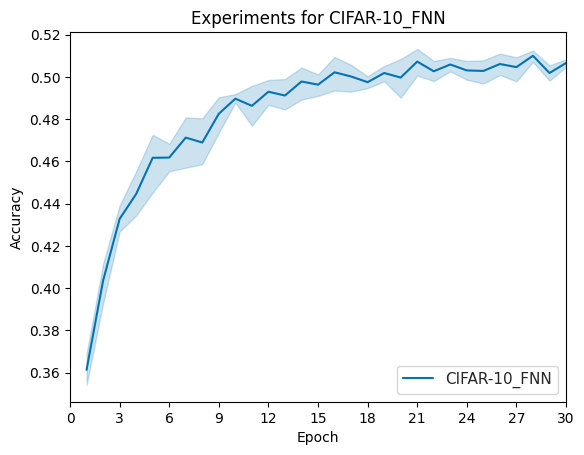

In [3]:
model = FNN(
    [
        {"in_features": 32 * 32 * 3, "out_features": 512},
        {"in_features": 512, "out_features": 256},
        {"in_features": 256, "out_features": 128},
        {"in_features": 128, "out_features": 10},
    ]
)

config = ExperimentConfig(
    model_name="CIFAR-10_FNN",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

### Running experiment CIFAR-10_FNN_NORMAL ###
### 1. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:07<00:00, 186.36it/s]


### 2. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:06<00:00, 188.08it/s]


### 3. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:06<00:00, 188.26it/s]


### 4. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:06<00:00, 190.38it/s]


### 5. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:08<00:00, 163.43it/s]


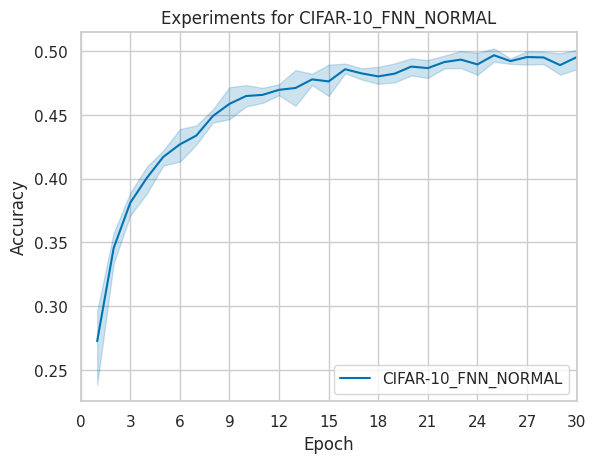

In [4]:
model = FNN(
    [
        {"in_features": 32 * 32 * 3, "out_features": 512},
        {"in_features": 512, "out_features": 256},
        {"in_features": 256, "out_features": 128},
        {"in_features": 128, "out_features": 10},
    ]
)
model.initialize("normal")

config = ExperimentConfig(
    model_name="CIFAR-10_FNN_NORMAL",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

### Running experiment CIFAR-10_FNN_NORMAL_LAST_LAYER ###
### 1. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:07<00:00, 164.76it/s]


### 2. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:08<00:00, 162.19it/s]


### 3. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:07<00:00, 186.37it/s]


### 4. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:07<00:00, 180.62it/s]


### 5. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:07<00:00, 183.02it/s]


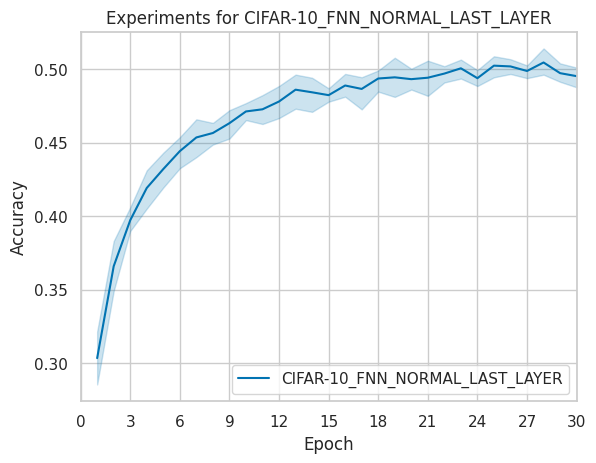

In [5]:
model = FNN(
    [
        {"in_features": 32 * 32 * 3, "out_features": 512},
        {"in_features": 512, "out_features": 256},
        {"in_features": 256, "out_features": 128},
        {"in_features": 128, "out_features": 10},
    ]
)
model.initialize("normal", softmax_init=True)

config = ExperimentConfig(
    model_name="CIFAR-10_FNN_NORMAL_LAST_LAYER",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

### Running experiment CIFAR-10_FNN_NORMAL_ELU_SCALE ###
### 1. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:07<00:00, 179.69it/s]


### 2. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:07<00:00, 183.73it/s]


### 3. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:07<00:00, 169.45it/s]


### 4. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:07<00:00, 175.87it/s]


### 5. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:07<00:00, 165.48it/s]


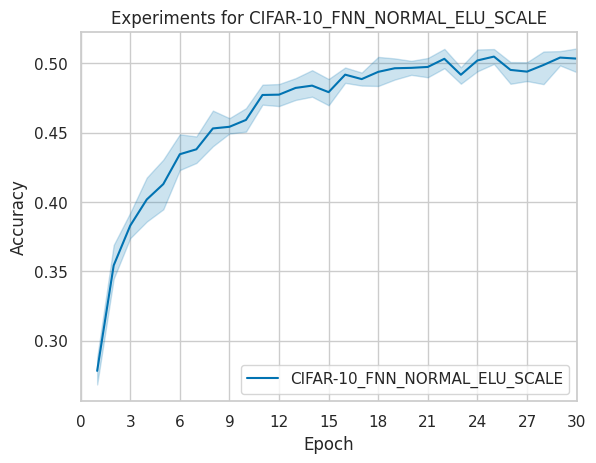

In [6]:
model = FNN(
    [
        {"in_features": 32 * 32 * 3, "out_features": 512},
        {"in_features": 512, "out_features": 256},
        {"in_features": 256, "out_features": 128},
        {"in_features": 128, "out_features": 10},
    ]
)
model.initialize("normal", ELU_SCALE_NORMAL)

config = ExperimentConfig(
    model_name="CIFAR-10_FNN_NORMAL_ELU_SCALE",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

### Running experiment CIFAR-10_FNN_NORMAL_IN_FEATURES ###
### 1. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:07<00:00, 175.56it/s]


### 2. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:07<00:00, 186.04it/s]


### 3. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:07<00:00, 183.53it/s]


### 4. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:07<00:00, 180.86it/s]


### 5. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:07<00:00, 178.06it/s]


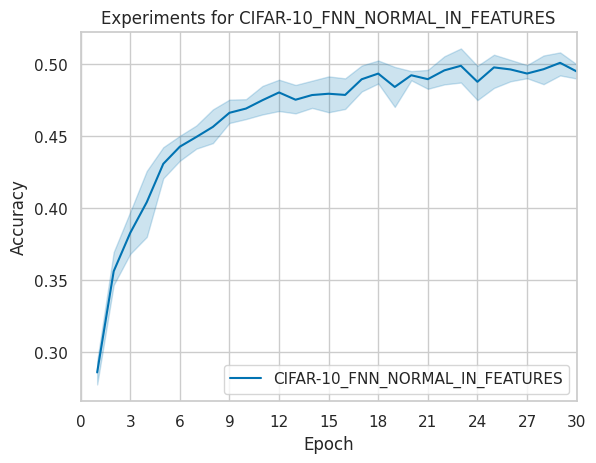

In [7]:
model = FNN(
    [
        {"in_features": 32 * 32 * 3, "out_features": 512},
        {"in_features": 512, "out_features": 256},
        {"in_features": 256, "out_features": 128},
        {"in_features": 128, "out_features": 10},
    ]
)
model.initialize("normal_in_features")

config = ExperimentConfig(
    model_name="CIFAR-10_FNN_NORMAL_IN_FEATURES",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [8]:
model = FNN(
    [
        {"in_features": 32 * 32 * 3, "out_features": 512},
        {"in_features": 512, "out_features": 256},
        {"in_features": 256, "out_features": 128},
        {"in_features": 128, "out_features": 10},
    ]
)
model.initialize("normal_in_features", softmax_init=True)

config = ExperimentConfig(
    model_name="CIFAR-10_FNN_NORMAL_IN_FEATURES_LAST_LAYER",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

### Running experiment CIFAR-10_FNN_NORMAL_IN_FEATURES_LAST_LAYER ###
### 1. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:08<00:00, 155.99it/s]


### 2. Run ###


Epoch 30/30: 100%|███████████████████████████████████| 1313/1313 [00:07<00:00, 164.35it/s]


### 3. Run ###


Epoch 1/30:  35%|█████████████                        | 465/1313 [00:02<00:05, 161.70it/s]

In [9]:
model = FNN(
    [
        {"in_features": 32 * 32 * 3, "out_features": 512},
        {"in_features": 512, "out_features": 256},
        {"in_features": 256, "out_features": 128},
        {"in_features": 128, "out_features": 10},
    ]
)
model.initialize("normal", mean=-1.0)

config = ExperimentConfig(
    model_name="CIFAR-10_FNN_NORMAL_MEAN_NEG",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [10]:
model = FNN(
    [
        {"in_features": 32 * 32 * 3, "out_features": 512},
        {"in_features": 512, "out_features": 256},
        {"in_features": 256, "out_features": 128},
        {"in_features": 128, "out_features": 10},
    ]
)
model.initialize("normal", mean=1.0)

config = ExperimentConfig(
    model_name="CIFAR-10_FNN_NORMAL_MEAN_POS",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [11]:
model = FNN(
    [
        {"in_features": 32 * 32 * 3, "out_features": 512},
        {"in_features": 512, "out_features": 256},
        {"in_features": 256, "out_features": 128},
        {"in_features": 128, "out_features": 10},
    ]
)
model.initialize("normal", mean=-5.0)

config = ExperimentConfig(
    model_name="CIFAR-10_FNN_NORMAL_MEAN_NEG_HIGH",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [12]:
model = FNN(
    [
        {"in_features": 32 * 32 * 3, "out_features": 512},
        {"in_features": 512, "out_features": 256},
        {"in_features": 256, "out_features": 128},
        {"in_features": 128, "out_features": 10},
    ]
)
model.initialize("normal", mean=5.0)

config = ExperimentConfig(
    model_name="CIFAR-10_FNN_NORMAL_MEAN_POS_HIGH",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [13]:
model = FNN(
    [
        {"in_features": 32 * 32 * 3, "out_features": 512},
        {"in_features": 512, "out_features": 256},
        {"in_features": 256, "out_features": 128},
        {"in_features": 128, "out_features": 10},
    ]
)
model.initialize("normal", mean=-50.0)

config = ExperimentConfig(
    model_name="CIFAR-10_FNN_NORMAL_MEAN_NEG_OVER",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [14]:
model = FNN(
    [
        {"in_features": 32 * 32 * 3, "out_features": 512},
        {"in_features": 512, "out_features": 256},
        {"in_features": 256, "out_features": 128},
        {"in_features": 128, "out_features": 10},
    ]
)
model.initialize("normal", mean=50.0)

config = ExperimentConfig(
    model_name="CIFAR-10_FNN_NORMAL_MEAN_POS_OVER",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [15]:
model = FNN(
    [
        {"in_features": 32 * 32 * 3, "out_features": 512},
        {"in_features": 512, "out_features": 256},
        {"in_features": 256, "out_features": 128},
        {"in_features": 128, "out_features": 10},
    ]
)
model.initialize("normal", scale_factor=0.1)

config = ExperimentConfig(
    model_name="CIFAR-10_FNN_NORMAL_0.1_STD",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [16]:
model = FNN(
    [
        {"in_features": 32 * 32 * 3, "out_features": 512},
        {"in_features": 512, "out_features": 256},
        {"in_features": 256, "out_features": 128},
        {"in_features": 128, "out_features": 10},
    ]
)
model.initialize("normal", scale_factor=0.5)

config = ExperimentConfig(
    model_name="CIFAR-10_FNN_NORMAL_0.5_STD",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)
run_experiments(model, config)

In [17]:
model = FNN(
    [
        {"in_features": 32 * 32 * 3, "out_features": 512},
        {"in_features": 512, "out_features": 256},
        {"in_features": 256, "out_features": 128},
        {"in_features": 128, "out_features": 10},
    ]
)
model.initialize("normal", scale_factor=2.0)

config = ExperimentConfig(
    model_name="CIFAR-10_FNN_NORMAL_2.0_STD",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

#### 3.1.1 Finding The Point Of Break

In [ ]:
factor_range = range(10, 301, 10)

for factor in factor_range:
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    model = FNN(
        [
            {"in_features": 32 * 32 * 3, "out_features": 512},
            {"in_features": 512, "out_features": 256},
            {"in_features": 256, "out_features": 128},
            {"in_features": 128, "out_features": 10},
        ]
    )
    model.initialize(mode="normal", scale_factor=factor)
    writer = SummaryWriter(f"./results/CIFAR-10_FNN_NORMAL_1_{factor}")
    trainer = Trainer(model=model, lr=0.001, writer=writer)

    trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=30, train_summary=False)

In [ ]:
factor_range = range(10, 301, 10)

for factor in factor_range:
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    model = FNN(
        [
            {"in_features": 32 * 32 * 3, "out_features": 512},
            {"in_features": 512, "out_features": 256},
            {"in_features": 256, "out_features": 256},
            {"in_features": 256, "out_features": 128},
            {"in_features": 128, "out_features": 128},
            {"in_features": 128, "out_features": 10},
        ]
    )
    model.initialize(mode="normal", scale_factor=factor)
    writer = SummaryWriter(f"./results/CIFAR-10_FNN_NORMAL_2_{factor}")
    trainer = Trainer(model=model, lr=0.001, writer=writer)

    trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=30, train_summary=False)

In [ ]:
train_loader, val_loader = get_cifar10_loader(train=True, batch_size=8)
test_loader = get_cifar10_loader(train=False, batch_size=8)

In [ ]:
factor_range = range(10, 301, 10)

for factor in factor_range:
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    model = FNN(
        [
            {"in_features": 32 * 32 * 3, "out_features": 512},
            {"in_features": 512, "out_features": 256},
            {"in_features": 256, "out_features": 128},
            {"in_features": 128, "out_features": 10},
        ]
    )
    model.initialize(mode="normal", scale_factor=factor)
    writer = SummaryWriter(f"./results/CIFAR-10_FNN_NORMAL_3_{factor}")
    trainer = Trainer(model=model, lr=0.001, writer=writer)

    trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=30, train_summary=False)

In [ ]:
factor_range = range(10, 301, 10)

for factor in factor_range:
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    model = FNN(
        [
            {"in_features": 32 * 32 * 3, "out_features": 512},
            {"in_features": 512, "out_features": 256},
            {"in_features": 256, "out_features": 256},
            {"in_features": 256, "out_features": 128},
            {"in_features": 128, "out_features": 128},
            {"in_features": 128, "out_features": 10},
        ]
    )
    model.initialize(mode="normal", scale_factor=factor)
    writer = SummaryWriter(f"./results/CIFAR-10_FNN_NORMAL_4_{factor}")
    trainer = Trainer(model=model, lr=0.001, writer=writer)

    trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=30, train_summary=False)

In [ ]:
factors = [10, 100, 1000, 10_000, 100_000, 1_000_000]

for factor in factors:
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    factor = 1 / factor

    model = FNN(
        [
            {"in_features": 32 * 32 * 3, "out_features": 512},
            {"in_features": 512, "out_features": 256},
            {"in_features": 256, "out_features": 128},
            {"in_features": 128, "out_features": 10},
        ]
    )
    model.initialize(mode="normal", scale_factor=factor)
    writer = SummaryWriter(f"./results/CIFAR-10_FNN_NORMAL_DOWN_{factor}")
    trainer = Trainer(model=model, lr=0.001, writer=writer)

    trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=30, train_summary=False)

### 3.2 Uniform Distribution

In [18]:
train_loader, val_loader = get_cifar10_loader(train=True, batch_size=32)
test_loader = get_cifar10_loader(train=False, batch_size=32)

#### 3.2.1 Zero To One Pre-Activations

In [24]:
model = FNN(
    [
        {"in_features": 32 * 32 * 3, "out_features": 512},
        {"in_features": 512, "out_features": 256},
        {"in_features": 256, "out_features": 128},
        {"in_features": 128, "out_features": 10},
    ]
)
model.initialize(mode="uniform", a=0, b=1)

config = ExperimentConfig(
    model_name="CIFAR-10_FNN_UNIFORM_0-1",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

#### 3.2.2 Unit Variance And Zero Mean Pre-Activations

In [25]:
model = FNN(
    [
        {"in_features": 32 * 32 * 3, "out_features": 512},
        {"in_features": 512, "out_features": 256},
        {"in_features": 256, "out_features": 128},
        {"in_features": 128, "out_features": 10},
    ]
)
model.initialize(mode="uniform", a=-math.sqrt(3), b=math.sqrt(3))

config = ExperimentConfig(
    model_name="CIFAR-10_FNN_UNIFORM_PRE_ACT",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [26]:
model = FNN(
    [
        {"in_features": 32 * 32 * 3, "out_features": 512},
        {"in_features": 512, "out_features": 256},
        {"in_features": 256, "out_features": 128},
        {"in_features": 128, "out_features": 10},
    ]
)
model.initialize(mode="deterministic", a=-1.73, b=1.73)

config = ExperimentConfig(
    model_name="CIFAR-10_FNN_UNIFORM_PRE_ACT_DET",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

#### 3.2.3 Unit Variance and Zero Mean Activations

In [27]:
model = FNN(
    [
        {"in_features": 32 * 32 * 3, "out_features": 512},
        {"in_features": 512, "out_features": 256},
        {"in_features": 256, "out_features": 128},
        {"in_features": 128, "out_features": 10},
    ]
)
model.initialize(mode="uniform", a=-3.437, b=2.222)

config = ExperimentConfig(
    model_name="CIFAR-10_FNN_UNIFORM_UNIT_VAR_ZERO_MEAN",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [28]:
model = FNN(
    [
        {"in_features": 32 * 32 * 3, "out_features": 512},
        {"in_features": 512, "out_features": 256},
        {"in_features": 256, "out_features": 128},
        {"in_features": 128, "out_features": 10},
    ]
)
model.initialize(mode="deterministic", a=-3.437, b=2.222)

config = ExperimentConfig(
    model_name="CIFAR-10_FNN_UNIFORM_UNIT_VAR_ZERO_MEAN_DET",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

#### 3.2.5 Comparison

### 3.3 Compare Our Approach to Others

In [ ]:
def objective(trial):
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    params = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True),
        "optimizer": trial.suggest_categorical("optimizer", [Adam, RMSprop, SGD]),
        "batch_size": trial.suggest_int("batch_size", 4, 64, 2),

    }

    train_loader, val_loader = get_cifar10_loader(train=True, batch_size=params["batch_size"])
    test_loader = get_cifar10_loader(train=False, batch_size=params["batch_size"])

    model = FNN(
        [
            {"in_features": 32 * 32 * 3, "out_features": 512},
            {"in_features": 512, "out_features": 256},
            {"in_features": 256, "out_features": 128},
            {"in_features": 128, "out_features": 10},
        ]
    )

    writer = SummaryWriter("./results/CIFAR_FNN_TRIAL")
    trainer = Trainer(model=model, lr=params["learning_rate"], optimizer=params["optimizer"], writer=writer)
    accuracy = trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=15, trial=trial,
                             train_summary=False)

    return accuracy


study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=28)

joblib.dump(study, os.path.join("results", "optuna", "cifar_fnn.pkl"))

In [ ]:
study = joblib.load(os.path.join("results", "optuna", "cifar_fnn.pkl"), 'r')

for key, value in study.best_trial.params.items():
    print("{}: {}".format(key, value))
print(f"final accuracy: {study.best_trial.value}")

optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
def objective(trial):
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    params = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True),
        "optimizer": trial.suggest_categorical("optimizer", [Adam, RMSprop, SGD]),
        "batch_size": trial.suggest_int("batch_size", 4, 64, 2),

    }

    train_loader, val_loader = get_cifar10_loader(train=True, batch_size=params["batch_size"])
    test_loader = get_cifar10_loader(train=False, batch_size=params["batch_size"])

    model = FNN(
        [
            {"in_features": 32 * 32 * 3, "out_features": 512},
            {"in_features": 512, "out_features": 256},
            {"in_features": 256, "out_features": 128},
            {"in_features": 128, "out_features": 10},
        ]
    )
    model.initialize("normal", softmax_init=True)

    writer = SummaryWriter("./results/CIFAR_FNN_TRIAL_NORMAL")
    trainer = Trainer(model=model, lr=params["learning_rate"], optimizer=params["optimizer"], writer=writer)
    accuracy = trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=15, trial=trial,
                             train_summary=False)

    return accuracy


study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=28)

joblib.dump(study, os.path.join("results", "optuna", "cifar_fnn_normal.pkl"))

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)
study = joblib.load(os.path.join("results", "optuna", "cifar_fnn_normal.pkl"), 'r')

for key, value in study.best_trial.params.items():
    print("{}: {}".format(key, value))
print(f"final accuracy: {study.best_trial.value}")

optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
def objective(trial):
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    params = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True),
        "optimizer": trial.suggest_categorical("optimizer", [Adam, RMSprop, SGD]),
        "batch_size": trial.suggest_int("batch_size", 4, 64, 2),

    }

    train_loader, val_loader = get_cifar10_loader(train=True, batch_size=params["batch_size"])
    test_loader = get_cifar10_loader(train=False, batch_size=params["batch_size"])

    model = FNN(
        [
            {"in_features": 32 * 32 * 3, "out_features": 512},
            {"in_features": 512, "out_features": 256},
            {"in_features": 256, "out_features": 128},
            {"in_features": 128, "out_features": 10},
        ]
    )
    model.initialize("uniform", a=0, b=1)

    writer = SummaryWriter("./results/CIFAR_FNN_TRIAL_UNIFORM")
    trainer = Trainer(model=model, lr=params["learning_rate"], optimizer=params["optimizer"], writer=writer)
    accuracy = trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=15, trial=trial,
                             train_summary=False)

    return accuracy


study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=28)

joblib.dump(study, os.path.join("results", "optuna", "cifar_fnn_uniform.pkl"))

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)
study = joblib.load(os.path.join("results", "optuna", "cifar_fnn_uniform.pkl"), 'r')

for key, value in study.best_trial.params.items():
    print("{}: {}".format(key, value))
print(f"final accuracy: {study.best_trial.value}")

optuna.visualization.plot_parallel_coordinate(study)

## 4 CIFAR-10 CNN

In [2]:
train_loader, val_loader = get_cifar10_loader(train=True, batch_size=32, flatten=False)
test_loader = get_cifar10_loader(train=False, batch_size=32, flatten=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
model = CIFARCNN()

config = ExperimentConfig(
    model_name="CIFAR-10_CNN",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

### 4.1 Normal Distribution

In [ ]:
model = CIFARCNN()
model.initialize("normal")

config = ExperimentConfig(
    model_name="CIFAR-10_CNN_NORMAL",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [ ]:
model = CIFARCNN()
model.initialize("normal", softmax_init=True)

config = ExperimentConfig(
    model_name="CIFAR-10_CNN_NORMAL_LAST_LAYER",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [ ]:
model = CIFARCNN()
model.initialize("normal", ELU_SCALE_NORMAL)

config = ExperimentConfig(
    model_name="CIFAR-10_CNN_NORMAL_ELU_SCALE",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [ ]:
model = CIFARCNN()
model.initialize("normal_in_features")

config = ExperimentConfig(
    model_name="CIFAR-10_CNN_NORMAL_IN_FEATURES",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [ ]:
model = CIFARCNN()
model.initialize("normal", mean=-1.0)

config = ExperimentConfig(
    model_name="CIFAR-10_CNN_NORMAL_MEAN_NEG",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [ ]:
model = CIFARCNN()
model.initialize("normal", mean=1.0)

config = ExperimentConfig(
    model_name="CIFAR-10_CNN_NORMAL_MEAN_POS",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [ ]:
model = CIFARCNN()
model.initialize("normal", mean=-5.0)

config = ExperimentConfig(
    model_name="CIFAR-10_CNN_NORMAL_MEAN_NEG_HIGH",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [ ]:
model = CIFARCNN()
model.initialize("normal", mean=5.0)

config = ExperimentConfig(
    model_name="CIFAR-10_CNN_NORMAL_MEAN_POS_HIGH",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [ ]:
model = CIFARCNN()
model.initialize("normal", mean=-50.0)

config = ExperimentConfig(
    model_name="CIFAR-10_CNN_NORMAL_MEAN_NEG_OVER",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [ ]:
model = CIFARCNN()
model.initialize("normal", mean=50.0)

config = ExperimentConfig(
    model_name="CIFAR-10_CNN_NORMAL_MEAN_POS_OVER",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [ ]:
model = CIFARCNN()
model.initialize("normal", scale_factor=0.1)

config = ExperimentConfig(
    model_name="CIFAR-10_CNN_NORMAL_0.1_STD",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [ ]:
model = CIFARCNN()
model.initialize("normal", scale_factor=0.5)

config = ExperimentConfig(
    model_name="CIFAR-10_CNN_NORMAL_0.5_STD",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [ ]:
model = CIFARCNN()
model.initialize("normal", scale_factor=2.0)

config = ExperimentConfig(
    model_name="CIFAR-10_CNN_NORMAL_2.0_STD",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [ ]:
model = CIFARCNN()
model.initialize("normal_in_features", softmax_init=True)

config = ExperimentConfig(
    model_name="CIFAR-10_CNN_NORMAL_IN_FEATURES_LAST_LAYER",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

### RESNET

In [ ]:
model = ResNet50()

config = ExperimentConfig(
    model_name="CIFAR-10_RESNET",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=40
)

run_experiments(model, config)

In [3]:
model = ResNet50()
model.initialize("normal")

config = ExperimentConfig(
    model_name="CIFAR-10_RESNET_NORMAL",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=40
)

run_experiments(model, config)

### Running experiment CIFAR-10_RESNET_NORMAL ###
### 1. Run ###


Epoch 40/40: 100%|████████████████████████████████████| 1313/1313 [01:36<00:00, 13.66it/s]


### 2. Run ###


Epoch 40/40: 100%|████████████████████████████████████| 1313/1313 [01:28<00:00, 14.83it/s]


### 3. Run ###


Epoch 35/40:  84%|██████████████████████████████▍     | 1109/1313 [01:24<00:15, 13.31it/s]

In [4]:
model = ResNet50()
model.initialize("normal", ELU_SCALE_NORMAL)

config = ExperimentConfig(
    model_name="CIFAR-10_RESNET_NORMAL_ELU_SCALE",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=40
)

run_experiments(model, config)

In [5]:
model = ResNet50()
model.initialize(mode="uniform", a=0, b=1)

config = ExperimentConfig(
    model_name="CIFAR-10_RESNET_UNIFORM_0-1",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=40
)

run_experiments(model, config)

In [6]:
model = ResNet50()
model.initialize(mode="uniform", a=-math.sqrt(3), b=math.sqrt(3))

config = ExperimentConfig(
    model_name="CIFAR-10_RESNET_UNIFORM_PRE_ACT",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=40
)

run_experiments(model, config)

In [7]:
model = ResNet50()
model.initialize(mode="deterministic", a=-1.73, b=1.73)

config = ExperimentConfig(
    model_name="CIFAR-10_RESNET_UNIFORM_PRE_ACT_DET",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=40
)

run_experiments(model, config)

In [8]:
model = ResNet50()
model.initialize(mode="uniform", a=-3.437, b=2.222)

config = ExperimentConfig(
    model_name="CIFAR-10_RESNET_UNIFORM_UNIT_VAR_ZERO_MEAN",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=40
)

run_experiments(model, config)

In [9]:
model = ResNet50()
model.initialize(mode="deterministic", a=-3.437, b=2.222)

config = ExperimentConfig(
    model_name="CIFAR-10_RESNET_UNIFORM_UNIT_VAR_ZERO_MEAN_DET",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=40
)

run_experiments(model, config)

#### 4.1.1 Finding The Point of Break

In [ ]:
factor_range = range(10, 301, 10)

for factor in factor_range:
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    model = CIFARCNN()
    model.initialize(mode="normal", scale_factor=factor)
    writer = SummaryWriter(f"./results/CIFAR-10_CNN_NORMAL_1_{factor}")
    trainer = Trainer(model=model, lr=0.001, writer=writer)

    trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=30, train_summary=False)

In [ ]:
factors = [10, 100, 1000, 10_000, 100_000, 1_000_000]

for factor in factors:
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    factor = 1 / factor

    model = CIFARCNN()
    model.initialize(mode="normal", scale_factor=factor)
    writer = SummaryWriter(f"./results/CIFAR-10_CNN_NORMAL_DOWN_{factor}")
    trainer = Trainer(model=model, lr=0.001, writer=writer)

    trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=30, train_summary=False)

### 4.2 Uniform Distribution

In [ ]:
train_loader, val_loader = get_cifar10_loader(train=True, batch_size=32, flatten=False)
test_loader = get_cifar10_loader(train=False, batch_size=32, flatten=False)

#### 4.2.1 Zero To One Pre-Activations

In [ ]:
model = CIFARCNN()
model.initialize(mode="uniform", a=0, b=1)

config = ExperimentConfig(
    model_name="CIFAR-10_CNN_UNIFORM_0-1",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

#### 4.2.2 Unit Variance And Zero Mean Pre-Activations

In [ ]:
model = CIFARCNN()
model.initialize(mode="uniform", a=-math.sqrt(3), b=math.sqrt(3))

config = ExperimentConfig(
    model_name="CIFAR-10_CNN_UNIFORM_PRE_ACT",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [ ]:
model = CIFARCNN()
model.initialize(mode="deterministic", a=-1.73, b=1.73)

config = ExperimentConfig(
    model_name="CIFAR-10_CNN_UNIFORM_PRE_ACT_DET",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

#### 4.2.3 Unit Variance and Zero Mean Activations

In [ ]:
model = CIFARCNN()
model.initialize(mode="uniform", a=-3.437, b=2.222)

config = ExperimentConfig(
    model_name="CIFAR-10_CNN_UNIFORM_UNIT_VAR_ZERO_MEAN",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

In [ ]:
model = CIFARCNN()
model.initialize(mode="deterministic", a=-3.437, b=2.222)

config = ExperimentConfig(
    model_name="CIFAR-10_CNN_UNIFORM_UNIT_VAR_ZERO_MEAN_DET",
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    epochs=30
)

run_experiments(model, config)

#### 4.2.5 Comparison

### 4.3 Compare Our Approach To Others

In [ ]:
def objective(trial):
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    params = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True),
        "optimizer": trial.suggest_categorical("optimizer", [Adam, RMSprop, SGD]),
        "batch_size": trial.suggest_int("batch_size", 4, 64, 2),

    }

    train_loader, val_loader = get_cifar10_loader(train=True, batch_size=params["batch_size"], flatten=False)
    test_loader = get_cifar10_loader(train=False, batch_size=params["batch_size"], flatten=False)

    model = CIFARCNN()

    writer = SummaryWriter("./results/CIFAR_CNN_TRIAL")
    trainer = Trainer(model=model, lr=params["learning_rate"], optimizer=params["optimizer"], writer=writer)
    accuracy = trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=15, trial=trial,
                             train_summary=False)

    return accuracy


study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=28)

joblib.dump(study, os.path.join("results", "optuna", "cifar_cnn.pkl"))

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)
study = joblib.load(os.path.join("results", "optuna", "cifar_cnn.pkl"), 'r')

for key, value in study.best_trial.params.items():
    print("{}: {}".format(key, value))
print(f"final accuracy: {study.best_trial.value}")

optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
def objective(trial):
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    params = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True),
        "optimizer": trial.suggest_categorical("optimizer", [Adam, RMSprop, SGD]),
        "batch_size": trial.suggest_int("batch_size", 4, 64, 2),

    }

    train_loader, val_loader = get_cifar10_loader(train=True, batch_size=params["batch_size"], flatten=False)
    test_loader = get_cifar10_loader(train=False, batch_size=params["batch_size"], flatten=False)

    model = CIFARCNN()
    model.initialize("normal_in_features")

    writer = SummaryWriter("./results/CIFAR_CNN_TRIAL_NORMAL")
    trainer = Trainer(model=model, lr=params["learning_rate"], optimizer=params["optimizer"], writer=writer)
    accuracy = trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=15, trial=trial,
                             train_summary=False)

    return accuracy


study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=28)

joblib.dump(study, os.path.join("results", "optuna", "cifar_cnn_normal.pkl"))

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)
study = joblib.load(os.path.join("results", "optuna", "cifar_cnn_normal.pkl"), 'r')

for key, value in study.best_trial.params.items():
    print("{}: {}".format(key, value))
print(f"final accuracy: {study.best_trial.value}")

optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
def objective(trial):
    torch.manual_seed(R_SEED)
    random.seed(R_SEED)
    np.random.seed(R_SEED)

    params = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True),
        "optimizer": trial.suggest_categorical("optimizer", [Adam, RMSprop, SGD]),
        "batch_size": trial.suggest_int("batch_size", 4, 64, 2),

    }

    train_loader, val_loader = get_cifar10_loader(train=True, batch_size=params["batch_size"], flatten=False)
    test_loader = get_cifar10_loader(train=False, batch_size=params["batch_size"], flatten=False)

    model = CIFARCNN()
    model.initialize('uniform', a=0, b=1)

    writer = SummaryWriter("./results/CIFAR_CNN_TRIAL_UNIFORM")
    trainer = Trainer(model=model, lr=params["learning_rate"], optimizer=params["optimizer"], writer=writer)
    accuracy = trainer.train(train_loader=train_loader, test_loader=test_loader, num_epochs=15, trial=trial,
                             train_summary=False)

    return accuracy


study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=28)

joblib.dump(study, os.path.join("results", "optuna", "cifar_cnn_uniform.pkl"))

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)
study = joblib.load(os.path.join("results", "optuna", "cifar_cnn_uniform.pkl"), 'r')

for key, value in study.best_trial.params.items():
    print("{}: {}".format(key, value))
print(f"final accuracy: {study.best_trial.value}")

optuna.visualization.plot_parallel_coordinate(study)